In [3]:
from sklearn.cluster import KMeans
import csv
import numpy as np
from numpy import genfromtxt
import sys
import matplotlib.pyplot as plt
from heatmap import heatmap
import seaborn as sns
from sklearn.cluster import SpectralClustering


In [4]:
def stripCSVTOMatrix(file):
    my_data = genfromtxt(file, delimiter=',')
    my_data = my_data[1:,1:]
    return my_data

In [5]:
def makeAdjacencyMatrix(m):
    np.fill_diagonal(m,0)

In [6]:
def getDiagonalMatrix(m):
    D = np.diag(m.sum(axis=1))
    return D

In [7]:
def getGraphLaplcain(diag, original):
    return diag - original

In [8]:
'''
D^(D - A) = I - D^A
'''
def normalizedGraphLaplacian(diag, original):
    return np.identity(len(diag)) - np.linalg.inv(diag) @ original

In [9]:
def getEigValVec(m):
    vals, vecs = np.linalg.eig(m)
    return vals, vecs

In [10]:
def clusterBasedMatrix(m, order):
    newMatrix = [[m[i][j] for j in order] for i in order]
    return newMatrix

In [11]:
def deleteBelowThreshold(m, threshold):
    threshold_indices = m <= threshold
    m[threshold_indices] = 0
    m = m.reshape(3168,3168)
    return m

In [12]:
def subMatrixFromBiggestCluster(m, clusterIndex):
    return m[clusterIndex, :][:, clusterIndex]

In [66]:
def biggestClusterIndex(dictionary):
    largest = max([len(dictionary[i]) for i in range(len(dictionary))])
    returnval = -1
    for key, value in dictionary.items():
        if largest == len(value):
            returnval = key
    return returnval

Main code part

In [13]:
file = "40_corona.csv"

In [14]:
corona_data = stripCSVTOMatrix(file)

In [15]:
#corona_data = deleteBelowThreshold(corona_data, 20)

In [16]:
makeAdjacencyMatrix(corona_data)

In [17]:
diag_corona = getDiagonalMatrix(corona_data)

In [18]:
graph_laplacian = getGraphLaplcain(diag_corona, corona_data)

In [19]:
normalized_gl = normalizedGraphLaplacian(diag_corona, corona_data)

Normalized version does not work when I delete elements below threshold. The error givse me singular matrix on inverse part of diagonal matrix.

--> Row sum is 0 

In [20]:
eigVal, eigVec = getEigValVec(graph_laplacian)

In [21]:
normal_eigval, normal_eigvec = getEigValVec(normalized_gl)

In [22]:
vecs = eigVec[:,np.argsort(eigVal)]
vals = eigVal[np.argsort(eigVal)]

In [23]:
normal_vecs = eigVec[:,np.argsort(normal_eigval)]
normal_vals = normal_eigval[np.argsort(normal_eigval)]

semi-log y plot (matplotlib)



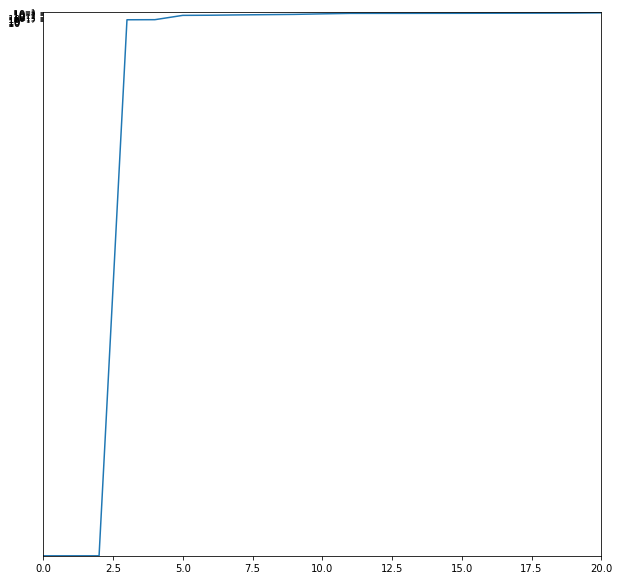

In [29]:
plt.figure(figsize=(10, 10))
plt.xlim([0, 20])
plt.ylim([0, 0.1])
plt.semilogy(list(range(0, len(normal_vals))), normal_vals )

In [26]:
normal_vals[0:20]

array([-1.58024869e-15, -9.34823374e-16, -1.44042776e-16,  1.25681184e-15,
        1.76434734e-15,  1.50998678e-07,  2.72138209e-07,  1.07011452e-06,
        3.17731190e-06,  9.34884935e-06,  9.71478388e-05,  6.82812342e-04,
        7.29232558e-04,  7.55646084e-04,  8.91085919e-04,  9.62444140e-04,
        1.26925148e-03,  1.54618890e-03,  1.93172541e-03,  2.64316092e-03])

It's better to overestimate on the number of clusters than underestimating them.

A lot smaller than 1 and really close to zero.

This is the plot for normalized eigenvalues to find out how many clusters to use.

Note that the scatter plot shows only the domain from 0 to 30 and range from 0 to 0.1 to find the values closest to 0.

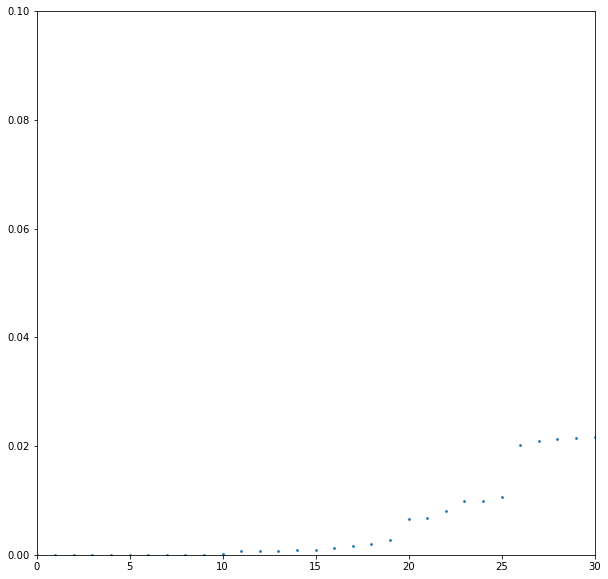

In [30]:
plt.figure(figsize=(10, 10))
plt.xlim([0, 30])
plt.ylim([0, 0.1])
plt.scatter(list(range(0, len(normal_vals))), normal_vals, s = 3)

In [31]:
num_clusters = 20

In [32]:
sc = SpectralClustering(num_clusters, affinity='precomputed', n_init=100, assign_labels='kmeans')
prediction = sc.fit_predict(corona_data)

/Users/won/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [33]:
predictionDict = {}

In [34]:
for i in range(len(prediction)):
    if prediction[i] in predictionDict:
        predictionDict[prediction[i]].append(i)
    else:
        predictionDict[prediction[i]] = []
        predictionDict[prediction[i]].append(i)

In [35]:
for i in range(num_clusters):
    print(f'Cluster {i} - {len(predictionDict[i])}')

Cluster 0 - 2233
Cluster 1 - 4
Cluster 2 - 2
Cluster 3 - 2
Cluster 4 - 2
Cluster 5 - 10
Cluster 6 - 2
Cluster 7 - 3
Cluster 8 - 21
Cluster 9 - 9
Cluster 10 - 2
Cluster 11 - 122
Cluster 12 - 61
Cluster 13 - 39
Cluster 14 - 386
Cluster 15 - 76
Cluster 16 - 2
Cluster 17 - 62
Cluster 18 - 126
Cluster 19 - 4


In [36]:
newOrder = list(predictionDict.values())

In [37]:
newOrder = [item for sublist in newOrder for item in sublist]

Result for 10 clusters

Cluster 0 - 1338<br>
Cluster 1 - 2<br>
Cluster 2 - 2<br>
Cluster 3 - 2<br>
Cluster 4 - 2<br>
Cluster 5 - 123<br>
Cluster 6 - 386<br>
Cluster 7 - 128<br>
Cluster 8 - 339<br>
Cluster 9 - 846<br>

Result for 15 clusters

Cluster 0 - 386<br>
Cluster 1 - 2<br>
Cluster 2 - 2<br>
Cluster 3 - 2<br>
Cluster 4 - 2<br>
Cluster 5 - 10<br>
Cluster 6 - 61<br>
Cluster 7 - 2085<br>
Cluster 8 - 87<br>
Cluster 9 - 2<br>
Cluster 10 - 39<br>
Cluster 11 - 2<br>
Cluster 12 - 62<br>
Cluster 13 - 126<br>
Cluster 14 - 300<br>

Result for 20 clusters

Cluster 0 - 2619<br>
Cluster 1 - 4<br>
Cluster 2 - 2<br>
Cluster 3 - 2<br>
Cluster 4 - 2<br>
Cluster 5 - 10<br>
Cluster 6 - 2<br>
Cluster 7 - 3<br>
Cluster 8 - 21<br>
Cluster 9 - 2<br>
Cluster 10 - 2<br>
Cluster 11 - 9<br>
Cluster 12 - 2<br>
Cluster 13 - 122<br>
Cluster 14 - 39<br>
Cluster 15 - 2<br>
Cluster 16 - 61<br>
Cluster 17 - 76<br>
Cluster 18 - 126<br>
Cluster 19 - 62<br>

Result for 30 clusters

Cluster 0 - 4<br>
Cluster 1 - 2817<br>
Cluster 2 - 2<br>
Cluster 3 - 2<br>
Cluster 4 - 8<br>
Cluster 5 - 4<br>
Cluster 6 - 2<br>
Cluster 7 - 2<br>
Cluster 8 - 4<br>
Cluster 9 - 2<br>
Cluster 10 - 2<br>
Cluster 11 - 3<br>
Cluster 12 - 2<br>
Cluster 13 - 3<br>
Cluster 14 - 2<br>
Cluster 15 - 7<br>
Cluster 16 - 3<br>
Cluster 17 - 11<br>
Cluster 18 - 9<br>
Cluster 19 - 2<br>
Cluster 20 - 2<br>
Cluster 21 - 41<br>
Cluster 22 - 3<br>
Cluster 23 - 118<br>
Cluster 24 - 3<br>
Cluster 25 - 6<br>
Cluster 26 - 61<br>
Cluster 27 - 39<br>
Cluster 28 - 1<br>
Cluster 29 - 3<br>


In [36]:
new_affinity_matrix = clusterBasedMatrix(corona_data, newOrder) 

In [37]:
new_affinity_matrix = np.array(new_affinity_matrix)

In [67]:
biggest_cluster = biggestClusterIndex(predictionDict)

In [68]:
print(biggest_cluster)

0


In [39]:
aff_matrix_biggest_cluster = subMatrixFromBiggestCluster(new_affinity_matrix, biggest_cluster)

In [40]:
subprediction = sc.fit_predict(aff_matrix_biggest_cluster)

/Users/won/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [41]:
biggest_cluster_prediction_dict = {}

In [42]:
for i in range(len(subprediction)):
    if subprediction[i] in biggest_cluster_prediction_dict:
        biggest_cluster_prediction_dict[subprediction[i]].append(i)
    else:
        biggest_cluster_prediction_dict[subprediction[i]] = []
        biggest_cluster_prediction_dict[subprediction[i]].append(i)

In [43]:
for i in range(num_clusters):
    print(f'Cluster {i} - {len(biggest_cluster_prediction_dict[i])}')

Cluster 0 - 26
Cluster 1 - 2
Cluster 2 - 2
Cluster 3 - 2
Cluster 4 - 189
Cluster 5 - 5
Cluster 6 - 5
Cluster 7 - 10
Cluster 8 - 4
Cluster 9 - 6
Cluster 10 - 13
Cluster 11 - 4
Cluster 12 - 5
Cluster 13 - 8
Cluster 14 - 27
Cluster 15 - 15
Cluster 16 - 4
Cluster 17 - 3
Cluster 18 - 3
Cluster 19 - 53


If the cluster is more balanced, 
Contingency matrix

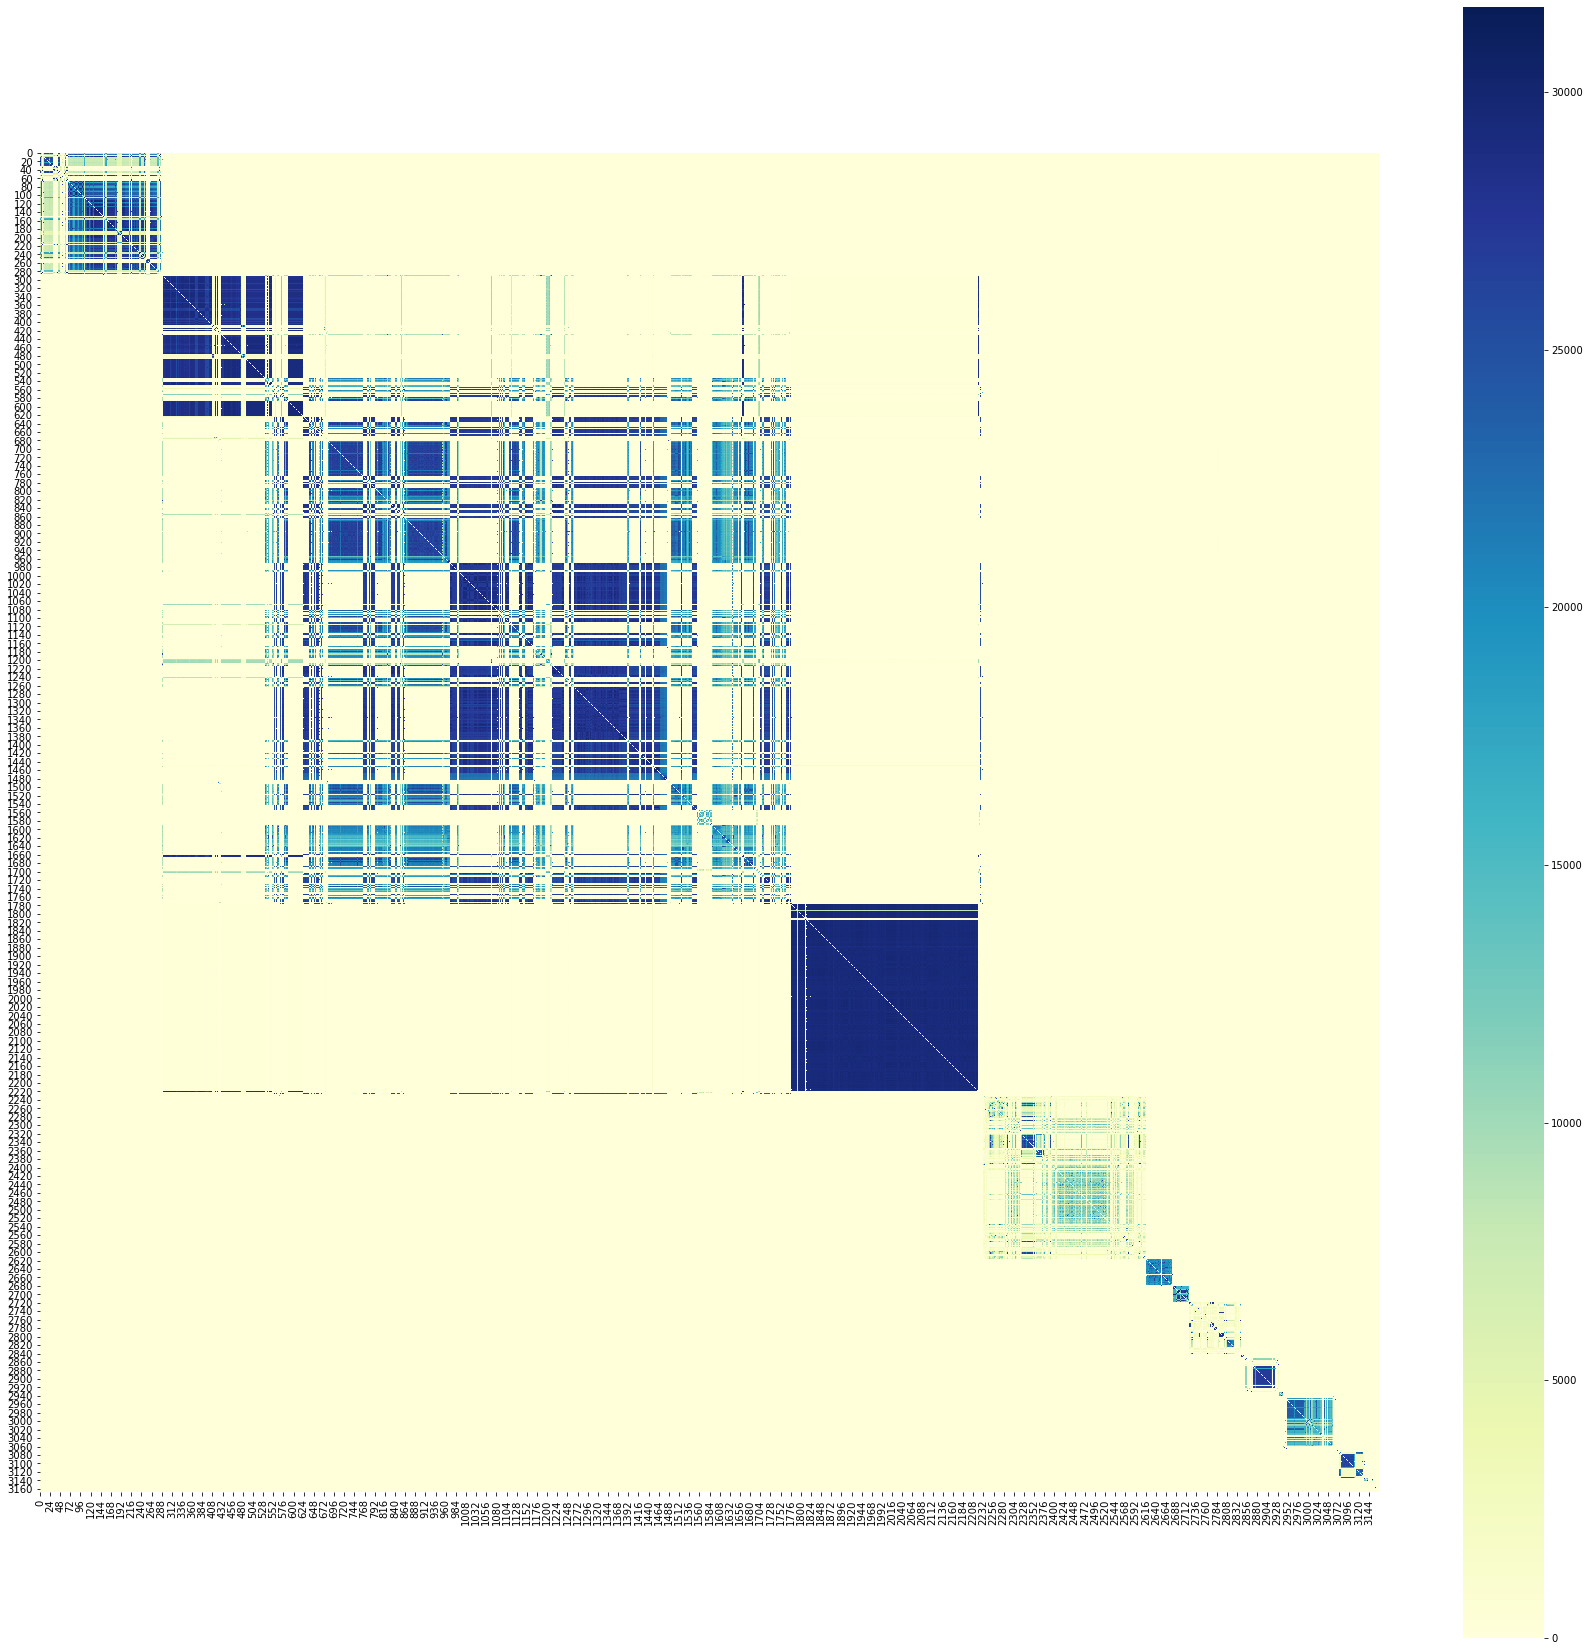

In [44]:
plt.figure(figsize=(30, 30))
sns.heatmap(new_affinity_matrix, square = True, cmap="YlGnBu") #Plot the correlation as heat map

After thresholding, use original affinity matrix to do Hierarchical clustering...

Compute the connected components. (Graph algorithm) BFS, 



Pseudoinverse of the laplacian. 



Dendrogram - picture of tree